# Discretización

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
# Para discretización
from sklearn.preprocessing import KBinsDiscretizer

In [3]:
data = pd.read_csv('../../datasets/raw/fifa_players.csv')
data.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('age', axis=1), data['age'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((12567, 50), (5387, 50))

# Se descretizan datos de edad, valor en euros y preferencia de pie para patear

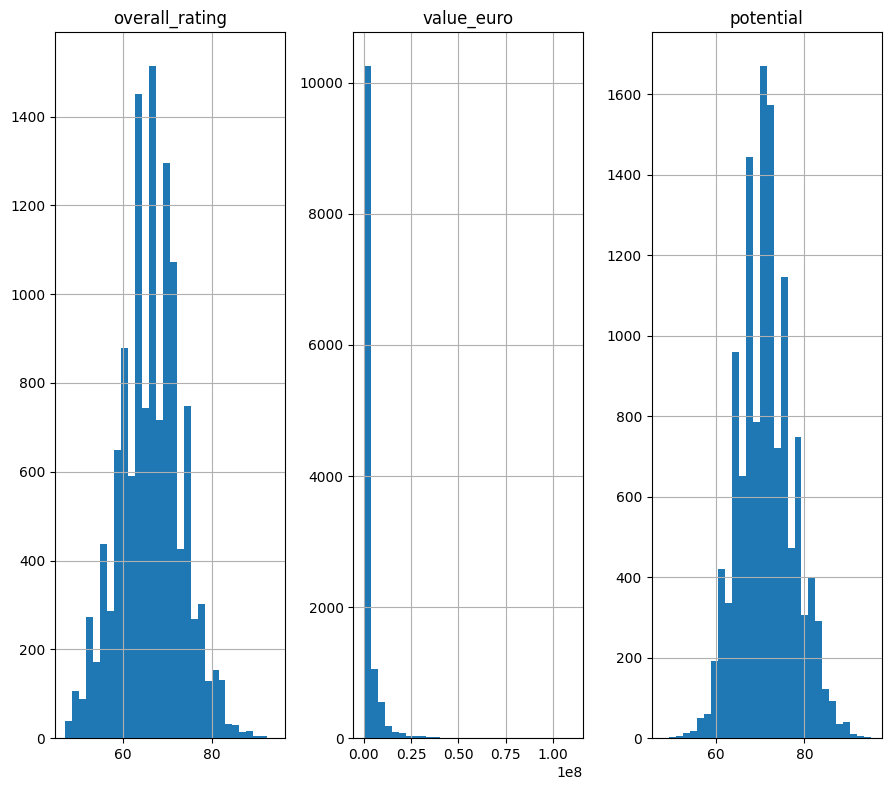

In [12]:
feature_to_discretize = ['overall_rating','value_euro', 'preferred_foot', 'potential']

# Verifica que las columnas existen en X_train
for feature in feature_to_discretize:
    if feature not in X_train.columns:
        raise ValueError(f"Feature '{feature}' no encontrada en X_train")

# Crear histogramas para cada característica especificada
X_train[feature_to_discretize].hist(bins=30, figsize=(12, 8), layout=(1, len(feature_to_discretize)))
plt.tight_layout()  # Ajusta el diseño para que no se solapen las etiquetas
plt.show()

In [11]:
print(X_train.columns)


Index(['name', 'full_name', 'birth_date', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type',
       'release_clause_euro', 'national_team', 'national_rating',
       'national_team_position', 'national_jersey_number', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle'],
      dtype='object')


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



# Variables a usar
feature_to_discretize = ['overall_rating', 'value_euro', 'preferred_foot', 'potential']

# Verifica que las columnas existen en el DataFrame
for feature in feature_to_discretize:
    if feature not in data.columns:
        raise ValueError(f"Feature '{feature}' no encontrada en el DataFrame")

# Selecciona las características y la variable objetivo
X = data[feature_to_discretize]
y = data['age']  # Variable objetivo

# Codificación One-Hot para 'preferred_foot'
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['preferred_foot'])
    ],
    remainder='passthrough'  # Deja las otras columnas sin cambios
)

# Divide los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

# Pipeline para el modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=0))
])

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R^2: {r2}')

# Mostrar las primeras filas de X_test junto con las predicciones
X_test = X_test.reset_index(drop=True)
predictions = pd.DataFrame({'Actual Age': y_test, 'Predicted Age': y_pred})
print(predictions.head())

MSE: 1.248619414048991
R^2: 0.9438719319386273
       Actual Age  Predicted Age
17074          25      25.588190
3184           36      35.481179
5339           18      20.640706
6665           18      19.362329
11053          25      23.848061


# Hicimos una discretización del overall rating que es un score que se da por el desempeño del jugador, el potencial y el valor en el mercado. Eso nos permite ver en que edad los jugadores tienen el mejor overall rating, y tal como en el futbol, muchos logran su mejor momento futbolistico entre los 20 y los 30 años.

In [15]:
data = {
    'name': ['Player1', 'Player2', 'Player3'],
    'age': [25, 30, 22],
    'overall_rating': [85, 90, 78]
}

df = pd.DataFrame(data)

# Reemplazar el índice por la columna 'name'
df.set_index('name', inplace=True)

print(df)

         age  overall_rating
name                        
Player1   25              85
Player2   30              90
Player3   22              78
